# Ensembles Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from CSV file into a DataFrame
df = pd.read_csv('rw_data_50000_steps.csv')

### Mean-Median

Ensemble: PRE20_mean_median
Mean: -0.022792276483770968
State Senate 2021 Plan: -0.0106376459553084

Ensemble: GOV20_mean_median
Mean: -0.01319830213419474
State Senate 2021 Plan: -0.0127899707142589

Ensemble: AUD20_mean_median
Mean: -0.011842042438432435
State Senate 2021 Plan: -0.0090338888352532

Ensemble: HAL20_mean_median
Mean: -0.018660382999710175
State Senate 2021 Plan: -0.0121293424721442

Ensemble: TRE20_mean_median
Mean: -0.008580685308354716
State Senate 2021 Plan: -0.0116091604185749

Ensemble: PSC20_mean_median
Mean: -0.00971990446683074
State Senate 2021 Plan: -0.0003387115878798



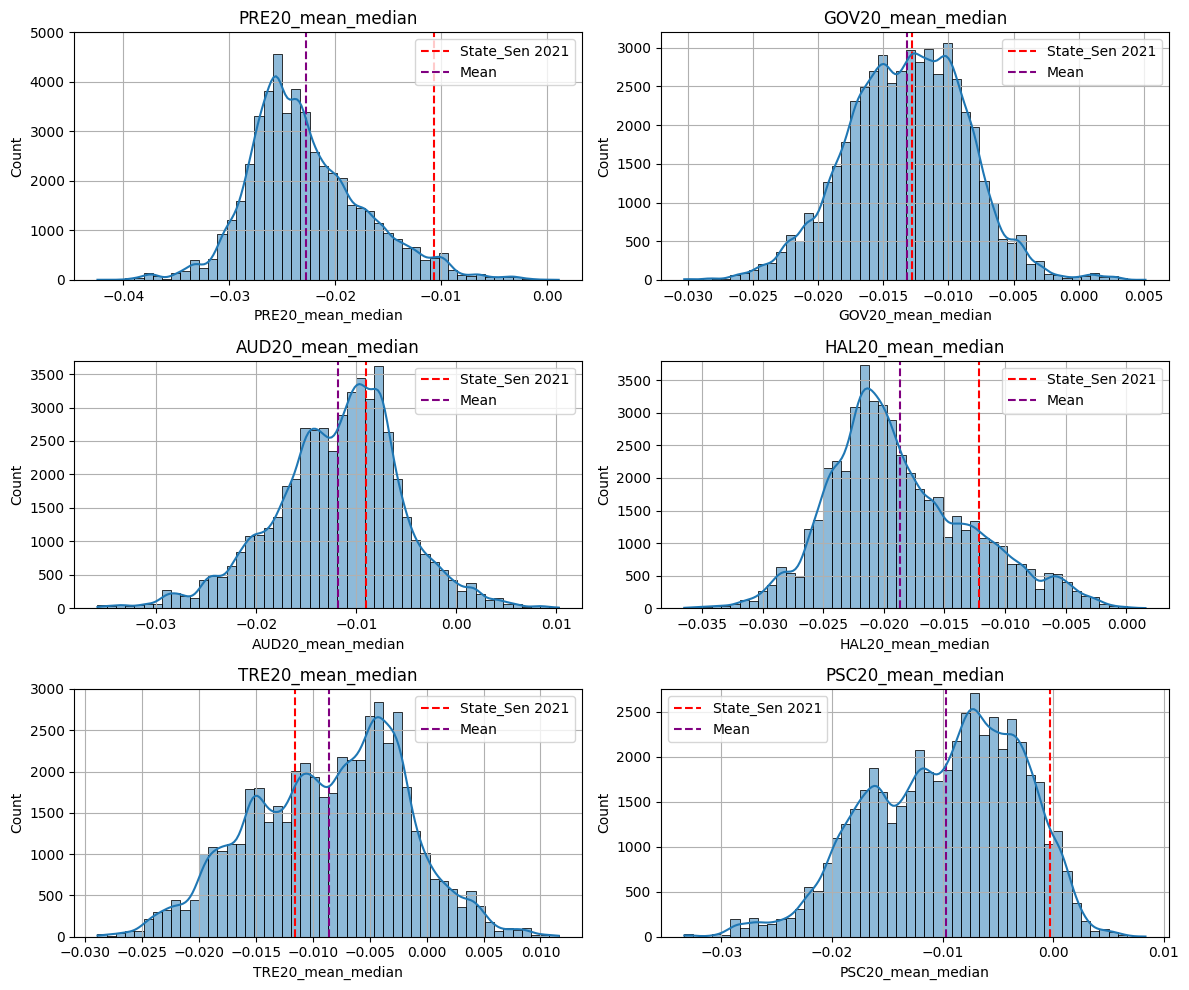

In [3]:
# Draw histograms of "PRE20_mean_median", "GOV20_mean_median", "AUD20_mean_median", "HAL20_mean_median", "TRE20_mean_median", "PSC20_mean_median" columns using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

columns = ['PRE20_mean_median', 'GOV20_mean_median', 'AUD20_mean_median', 'HAL20_mean_median', 'TRE20_mean_median', 'PSC20_mean_median']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    # Set the maximum value of the y-axis
    if column == 'PRE20_mean_median':
        ymax = 5000
    elif column == 'GOV20_mean_median':
        ymax = 3200
    elif column == 'AUD20_mean_median':
        ymax = 3700
    elif column == 'HAL20_mean_median':
        ymax = 3800
    elif column == 'TRE20_mean_median':
        ymax = 3000
    elif column == 'PSC20_mean_median':
        ymax = 2750

    initial_plan_value = df[column].iloc[0]
    mean_value = df[column].mean()

    print(f"Ensemble: {column}")
    print(f"Mean: {mean_value}")
    print(f"State Senate 2021 Plan: {initial_plan_value}")
    print()

    axes[row, col].set_title(column)
    axes[row, col].grid(True)
    axes[row, col].vlines(x=initial_plan_value, ymin=0, ymax=ymax, color='red', linestyles='dashed')
    axes[row, col].vlines(x=mean_value, ymin=0, ymax=ymax, color='purple', linestyles='dashed')
    sns.histplot(df[column], bins=50, kde=True, ax=axes[row, col])
    axes[row, col].set_ylim(0, ymax)
    axes[row, col].legend(['State_Sen 2021', 'Mean'])

plt.tight_layout()
plt.show()

### Efficiency Gap

Ensemble: PRE20_efficiency_gap
Mean: -0.044278322104842345
State Senate 2021 Plan: -0.0360372344270922

Ensemble: GOV20_efficiency_gap
Mean: -0.052400237934773525
State Senate 2021 Plan: -0.0384776091034564

Ensemble: AUD20_efficiency_gap
Mean: -0.07234210674344708
State Senate 2021 Plan: -0.0671025098545075

Ensemble: HAL20_efficiency_gap
Mean: -0.03201068801729729
State Senate 2021 Plan: -0.0118014429711367

Ensemble: TRE20_efficiency_gap
Mean: -0.10865807469172424
State Senate 2021 Plan: -0.1049500701727907

Ensemble: PSC20_efficiency_gap
Mean: -0.07569750518355975
State Senate 2021 Plan: -0.0685718738445292



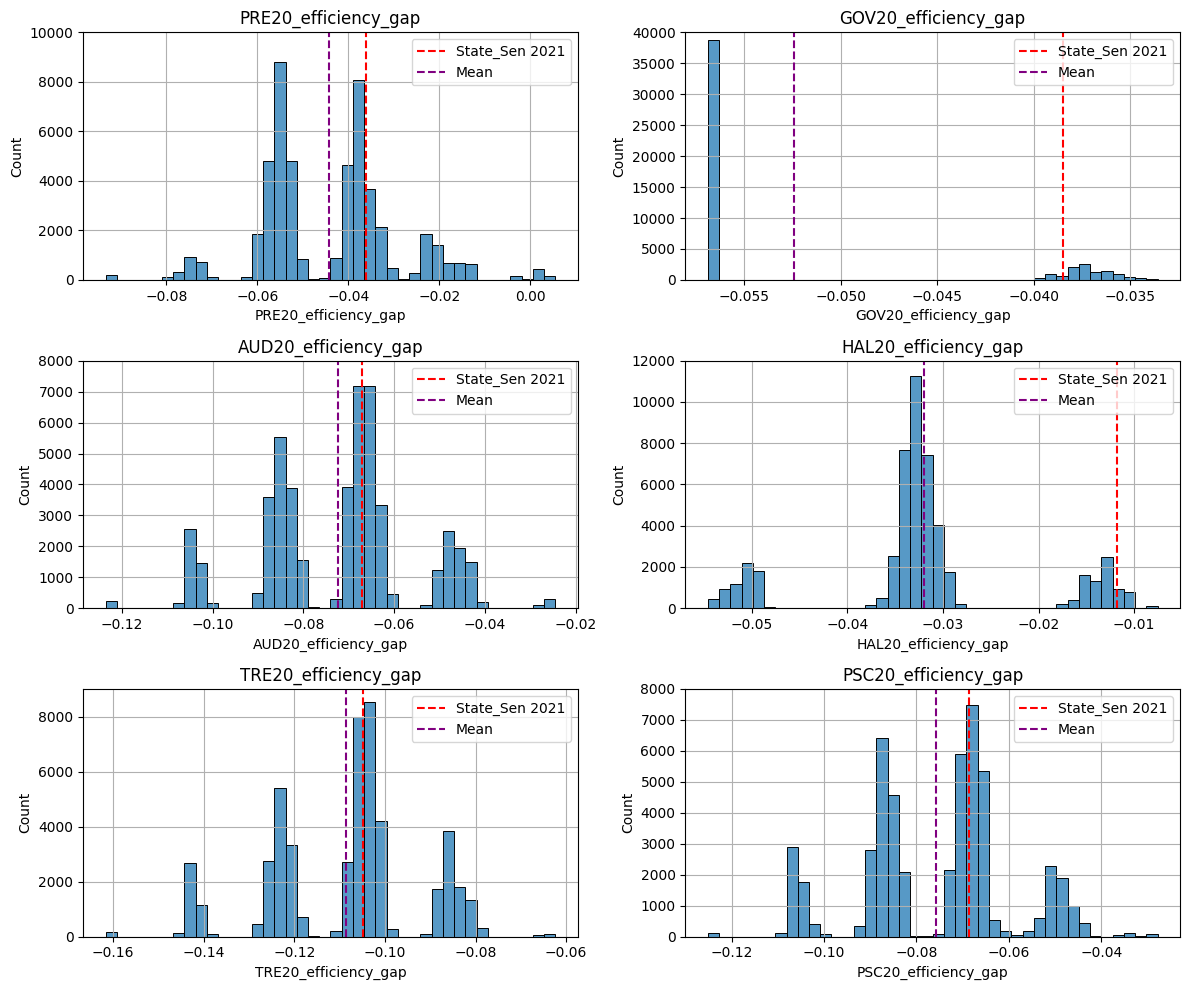

In [4]:
# Draw histograms for "PRE20_efficiency_gap", "GOV20_efficiency_gap", "AUD20_efficiency_gap", "HAL20_efficiency_gap", "TRE20_efficiency_gap", "PSC20_efficiency_gap" columns using Seaborn

columns = ['PRE20_efficiency_gap', 'GOV20_efficiency_gap', 'AUD20_efficiency_gap', 'HAL20_efficiency_gap', 'TRE20_efficiency_gap', 'PSC20_efficiency_gap']

# Create a figure and axes for the grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Iterate over the columns and plot the histograms
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    # Set the maximum value of the y-axis
    if column == 'PRE20_efficiency_gap':
        ymax = 10000
    elif column == 'GOV20_efficiency_gap':
        ymax = 40000
    elif column == 'AUD20_efficiency_gap':
        ymax = 8000
    elif column == 'HAL20_efficiency_gap':
        ymax = 12000
    elif column == 'TRE20_efficiency_gap':
        ymax = 9000
    elif column == 'PSC20_efficiency_gap':
        ymax = 8000

    initial_plan_value = df[column].iloc[0]
    mean_value = df[column].mean()

    print(f"Ensemble: {column}")
    print(f"Mean: {mean_value}")
    print(f"State Senate 2021 Plan: {initial_plan_value}")
    print()

    axes[row, col].set_title(column)
    axes[row, col].grid(True)
    axes[row, col].vlines(x=initial_plan_value, ymin=0, ymax=ymax, color='red', linestyles='dashed')
    axes[row, col].vlines(x=mean_value, ymin=0, ymax=ymax, color='purple', linestyles='dashed')
    sns.histplot(df[column], bins=40, ax=axes[row, col])
    axes[row, col].set_ylim(0, ymax)
    axes[row, col].legend(['State_Sen 2021', 'Mean'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Partisan Bias

Ensemble: PRE20_partisan_bias
Mean: -0.06854054408273531
State Senate 2021 Plan: -0.0531914893617021

Ensemble: GOV20_partisan_bias
Mean: -0.07945309178922799
State Senate 2021 Plan: -0.0957446808510638

Ensemble: AUD20_partisan_bias
Mean: -0.04326956014071204
State Senate 2021 Plan: -0.0319148936170212

Ensemble: HAL20_partisan_bias
Mean: -0.07012476771741157
State Senate 2021 Plan: -0.0319148936170212

Ensemble: TRE20_partisan_bias
Mean: -0.03519397697152437
State Senate 2021 Plan: -0.0744680851063829

Ensemble: PSC20_partisan_bias
Mean: -0.040138133407544574
State Senate 2021 Plan: -0.0106382978723404



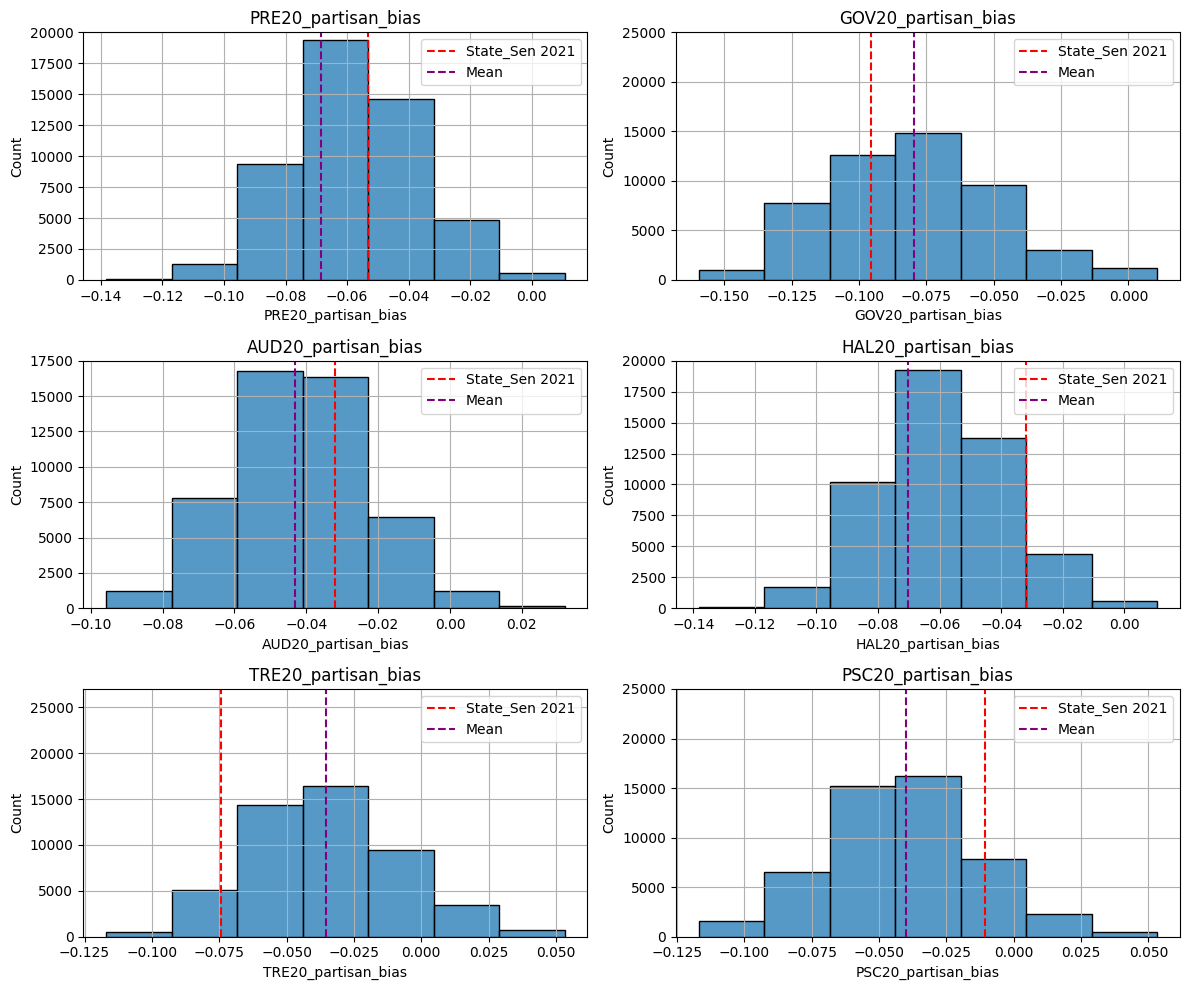

In [5]:
# Draw histograms for "PRE20_partisan_bias", "GOV20_partisan_bias", "AUD20_partisan_bias", "HAL20_partisan_bias", "TRE20_partisan_bias", "PSC20_partisan_bias" columns using Seaborn

columns = ['PRE20_partisan_bias', 'GOV20_partisan_bias', 'AUD20_partisan_bias', 'HAL20_partisan_bias', 'TRE20_partisan_bias', 'PSC20_partisan_bias']

# Create a figure and axes for the grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Iterate over the columns and plot the histograms
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    # Set the maximum value of the y-axis
    if column == 'PRE20_partisan_bias':
        ymax = 20000
    elif column == 'GOV20_partisan_bias':
        ymax = 25000
    elif column == 'AUD20_partisan_bias':
        ymax = 17500
    elif column == 'HAL20_partisan_bias':
        ymax = 20000
    elif column == 'TRE20_partisan_bias':
        ymax = 27000
    elif column == 'PSC20_partisan_bias':
        ymax = 25000

    initial_plan_value = df[column].iloc[0]
    mean_value = df[column].mean()

    print(f"Ensemble: {column}")
    print(f"Mean: {mean_value}")
    print(f"State Senate 2021 Plan: {initial_plan_value}")
    print()

    axes[row, col].set_title(column)
    axes[row, col].grid(True)
    axes[row, col].vlines(x=initial_plan_value, ymin=0, ymax=ymax, color='red', linestyles='dashed')
    axes[row, col].vlines(x=mean_value, ymin=0, ymax=ymax, color='purple', linestyles='dashed')
    sns.histplot(df[column], bins=7, ax=axes[row, col])
    axes[row, col].set_ylim(0, ymax)
    axes[row, col].legend(['State_Sen 2021', 'Mean'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Cut Edges

Ensemble: cut_edges
Mean: 6913.861262774744
State Senate 2021 Plan: 4781



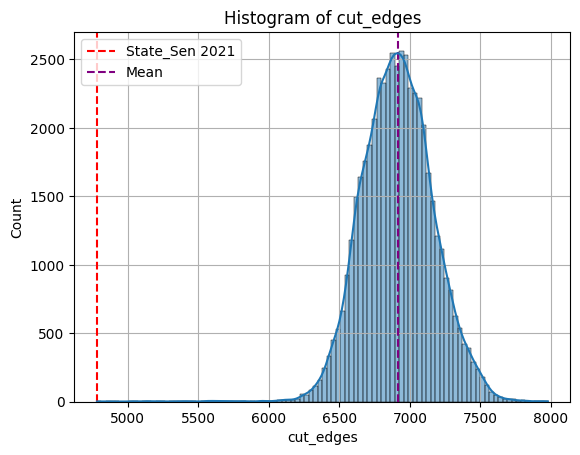

In [6]:
# Draw histograms for "cut_edges" column using Seaborn
ymax = 2700
column = 'cut_edges'

initial_plan_value = df[column].iloc[0]
mean_value = df[column].mean()

print(f"Ensemble: {column}")
print(f"Mean: {mean_value}")
print(f"State Senate 2021 Plan: {initial_plan_value}")
print()

plt.vlines(x=initial_plan_value, ymin=0, ymax=ymax, color='red', linestyles='dashed')
plt.vlines(x=mean_value, ymin=0, ymax=ymax, color='purple', linestyles='dashed')
sns.histplot(df[column], bins=100, kde=True)
plt.ylim(0, ymax)
plt.legend(['State_Sen 2021', 'Mean'])
plt.title('Histogram of cut_edges')
plt.grid(True)
plt.show()

### Majority Native American Districts

In [7]:
# Calculate the number of districts where the Native American population is a majority
nat_maj_df = pd.DataFrame()
nat_vap_maj_df = pd.DataFrame()
for i in range (1, 48):
    pop_col = f'population_{i}'
    vap_col = f'voting age population_{i}'
    native_pop_col = f'native population_{i}'
    vap_native_pop_col = f'native voting age population_{i}'

    nat_maj_df[i] = df[native_pop_col] > df[pop_col]*0.5
    nat_vap_maj_df[i] = df[vap_native_pop_col] > df[vap_col]*0.5

nat_maj_df['Maj Native American Dist'] = nat_maj_df.sum(axis=1)
nat_vap_maj_df['Maj VAP Native American Dist'] = nat_vap_maj_df.sum(axis=1)

Ensemble: Maj Native American Dist
Mean: 0.7578448431031379
State Senate 2021 Plan: 1



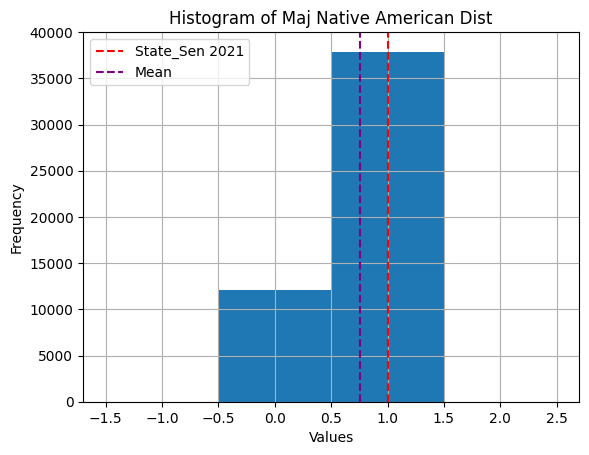

In [8]:
# Draw a histogram of the "Maj Native American Dist" column
column_name = 'Maj Native American Dist'

initial_plan_value = nat_maj_df[column_name].iloc[0]
mean_value = nat_maj_df[column_name].mean()
print(f"Ensemble: {column_name}")
print(f"Mean: {mean_value}")
print(f"State Senate 2021 Plan: {initial_plan_value}")
print()

nat_maj_df[column_name].hist(bins=range(-1, 4, 1), align='left')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.vlines(x=initial_plan_value, ymin=0, ymax=40000, color='red', linestyles='dashed')
plt.vlines(x=mean_value, ymin=0, ymax=40000, color='purple', linestyles='dashed')
plt.legend(['State_Sen 2021', 'Mean'])
plt.ylim(0, 40000)
plt.show()

Ensemble: Maj VAP Native American Dist
Mean: 0.4314513709725806
State Senate 2021 Plan: 1



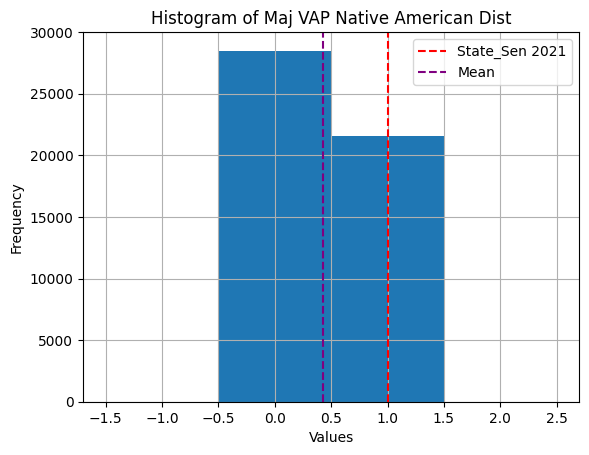

In [9]:
# Draw a histogram of the "Maj VAP Native American Dist" column
column_name = 'Maj VAP Native American Dist'

initial_plan_value = nat_vap_maj_df[column_name].iloc[0]
mean_value = nat_vap_maj_df[column_name].mean()
print(f"Ensemble: {column_name}")
print(f"Mean: {mean_value}")
print(f"State Senate 2021 Plan: {initial_plan_value}")
print()

nat_vap_maj_df[column_name].hist(bins=range(-1, 4, 1), align='left')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.vlines(x=initial_plan_value, ymin=0, ymax=30000, color='red', linestyles='dashed')
plt.vlines(x=mean_value, ymin=0, ymax=30000, color='purple', linestyles='dashed')
plt.legend(['State_Sen 2021', 'Mean'])
plt.ylim(0, 30000)
plt.show()

### Democratic and Republican Win Districts per Election

In [10]:
# Calculate the democratic and republican win districts for each election
agg_win_df = pd.DataFrame()
for election in ["PRE20", "GOV20", "AUD20", "HAL20", "TRE20", "PSC20"]:
    election_dem_win_df = pd.DataFrame()
    election_rep_win_df = pd.DataFrame()
    for i in range (1, 48):
        pres_dem_col = f'{election}_Democratic_{i}'
        pres_rep_col = f'{election}_Republican_{i}'
    
        election_dem_win_df[i] = df[pres_dem_col] > df[pres_rep_col]
        election_rep_win_df[i] = df[pres_rep_col] > df[pres_dem_col]
    
    agg_win_df[f'{election}_Democratic Win Districts'] = election_dem_win_df.sum(axis=1)
    agg_win_df[f'{election}_Republican Win Districts'] = election_rep_win_df.sum(axis=1)

Ensemble: PRE20_Democratic Win Districts
Mean: 5.6186476270474595
State Senate 2021 Plan: 6

Ensemble: GOV20_Democratic Win Districts
Mean: 0.2262154756904862
State Senate 2021 Plan: 1

Ensemble: AUD20_Democratic Win Districts
Mean: 3.6747465050698986
State Senate 2021 Plan: 4

Ensemble: HAL20_Democratic Win Districts
Mean: 2.026059478810424
State Senate 2021 Plan: 3

Ensemble: TRE20_Democratic Win Districts
Mean: 3.763564728705426
State Senate 2021 Plan: 4

Ensemble: PSC20_Democratic Win Districts
Mean: 3.595588088238235
State Senate 2021 Plan: 4



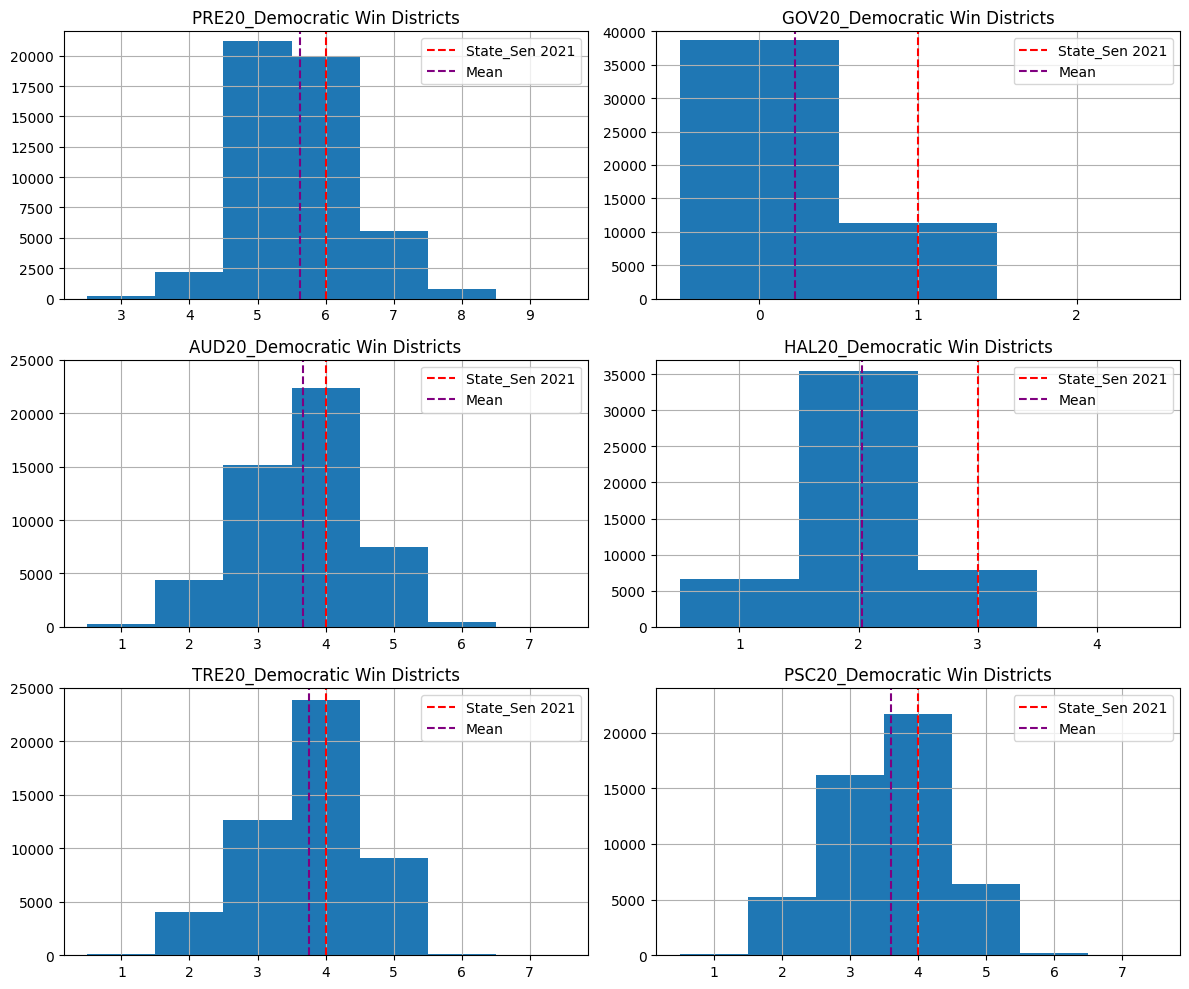

In [11]:
# Draw histograms for "PRE20_Democratic Win Districts", "GOV20_Democratic Win Districts", "AUD20_Democratic Win Districts", "HAL20_Democratic Win Districts", "TRE20_Democratic Win Districts", "PSC20_Democratic Win Districts" columns using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

columns = ['PRE20_Democratic Win Districts', 'GOV20_Democratic Win Districts', 'AUD20_Democratic Win Districts', 'HAL20_Democratic Win Districts', 'TRE20_Democratic Win Districts', 'PSC20_Democratic Win Districts']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    # Set the maximum value of the y-axis
    if column == 'PRE20_Democratic Win Districts':
        ymax = 22000
    elif column == 'GOV20_Democratic Win Districts':
        ymax = 40000
    elif column == 'AUD20_Democratic Win Districts':
        ymax = 25000
    elif column == 'HAL20_Democratic Win Districts':
        ymax = 37000
    elif column == 'TRE20_Democratic Win Districts':
        ymax = 25000
    elif column == 'PSC20_Democratic Win Districts':
        ymax = 24000

    initial_plan_value = agg_win_df[column].iloc[0]
    mean_value = agg_win_df[column].mean()

    print(f"Ensemble: {column}")
    print(f"Mean: {mean_value}")
    print(f"State Senate 2021 Plan: {initial_plan_value}")
    print()

    axes[row, col].hist(agg_win_df[column], bins=range(min(agg_win_df[column]), max(agg_win_df[column]) + 3), align='left')
    axes[row, col].set_xticks(range(min(agg_win_df[column]), max(agg_win_df[column]) + 3))
    axes[row, col].set_title(column)
    axes[row, col].grid(True)
    axes[row, col].vlines(x=initial_plan_value, ymin=0, ymax=ymax, color='red', linestyles='dashed')
    axes[row, col].vlines(x=mean_value, ymin=0, ymax=ymax, color='purple', linestyles='dashed')
    axes[row, col].legend(['State_Sen 2021', 'Mean'])
    axes[row, col].set_ylim(0, ymax)

plt.tight_layout()

plt.show()

Ensemble: PRE20_Republican Win Districts
Mean: 41.38135237295254
State Senate 2021 Plan: 41

Ensemble: GOV20_Republican Win Districts
Mean: 46.77378452430951
State Senate 2021 Plan: 46

Ensemble: AUD20_Republican Win Districts
Mean: 43.3252534949301
State Senate 2021 Plan: 43

Ensemble: HAL20_Republican Win Districts
Mean: 44.973940521189576
State Senate 2021 Plan: 44

Ensemble: TRE20_Republican Win Districts
Mean: 43.236435271294575
State Senate 2021 Plan: 43

Ensemble: PSC20_Republican Win Districts
Mean: 43.40441191176176
State Senate 2021 Plan: 43



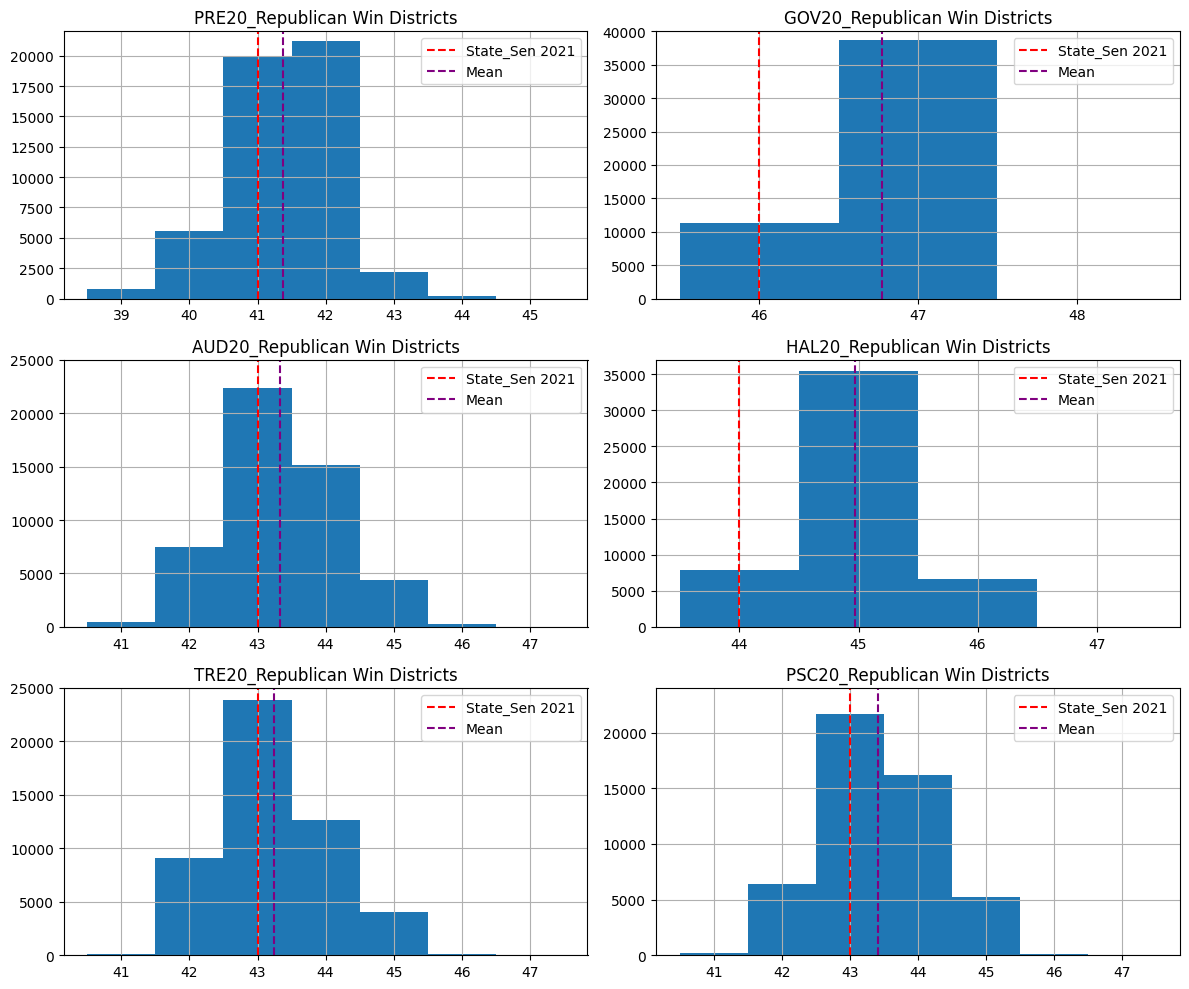

In [12]:
# Draw histograms for "PRE20_Republican Win Districts", "GOV20_Republican Win Districts", "AUD20_Republican Win Districts", "HAL20_Republican Win Districts", "TRE20_Republican Win Districts", "PSC20_Republican Win Districts" columns using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

columns = ['PRE20_Republican Win Districts', 'GOV20_Republican Win Districts', 'AUD20_Republican Win Districts', 'HAL20_Republican Win Districts', 'TRE20_Republican Win Districts', 'PSC20_Republican Win Districts']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    # Set the maximum value of the y-axis
    if column == 'PRE20_Republican Win Districts':
        ymax = 22000
    elif column == 'GOV20_Republican Win Districts':
        ymax = 40000
    elif column == 'AUD20_Republican Win Districts':
        ymax = 25000
    elif column == 'HAL20_Republican Win Districts':
        ymax = 37000
    elif column == 'TRE20_Republican Win Districts':
        ymax = 25000
    elif column == 'PSC20_Republican Win Districts':
        ymax = 24000

    initial_plan_value = agg_win_df[column].iloc[0]
    mean_value = agg_win_df[column].mean()

    print(f"Ensemble: {column}")
    print(f"Mean: {mean_value}")
    print(f"State Senate 2021 Plan: {initial_plan_value}")
    print()

    axes[row, col].hist(agg_win_df[column], bins=range(min(agg_win_df[column]), max(agg_win_df[column]) + 3), align='left')
    axes[row, col].set_xticks(range(min(agg_win_df[column]), max(agg_win_df[column]) + 3))
    axes[row, col].set_title(column)
    axes[row, col].grid(True)
    axes[row, col].vlines(x=initial_plan_value, ymin=0, ymax=ymax, color='red', linestyles='dashed')
    axes[row, col].vlines(x=mean_value, ymin=0, ymax=ymax, color='purple', linestyles='dashed')
    axes[row, col].legend(['State_Sen 2021', 'Mean'])
    axes[row, col].set_ylim(0, ymax)

plt.tight_layout()

plt.show()

### Signature of Gerrymandering

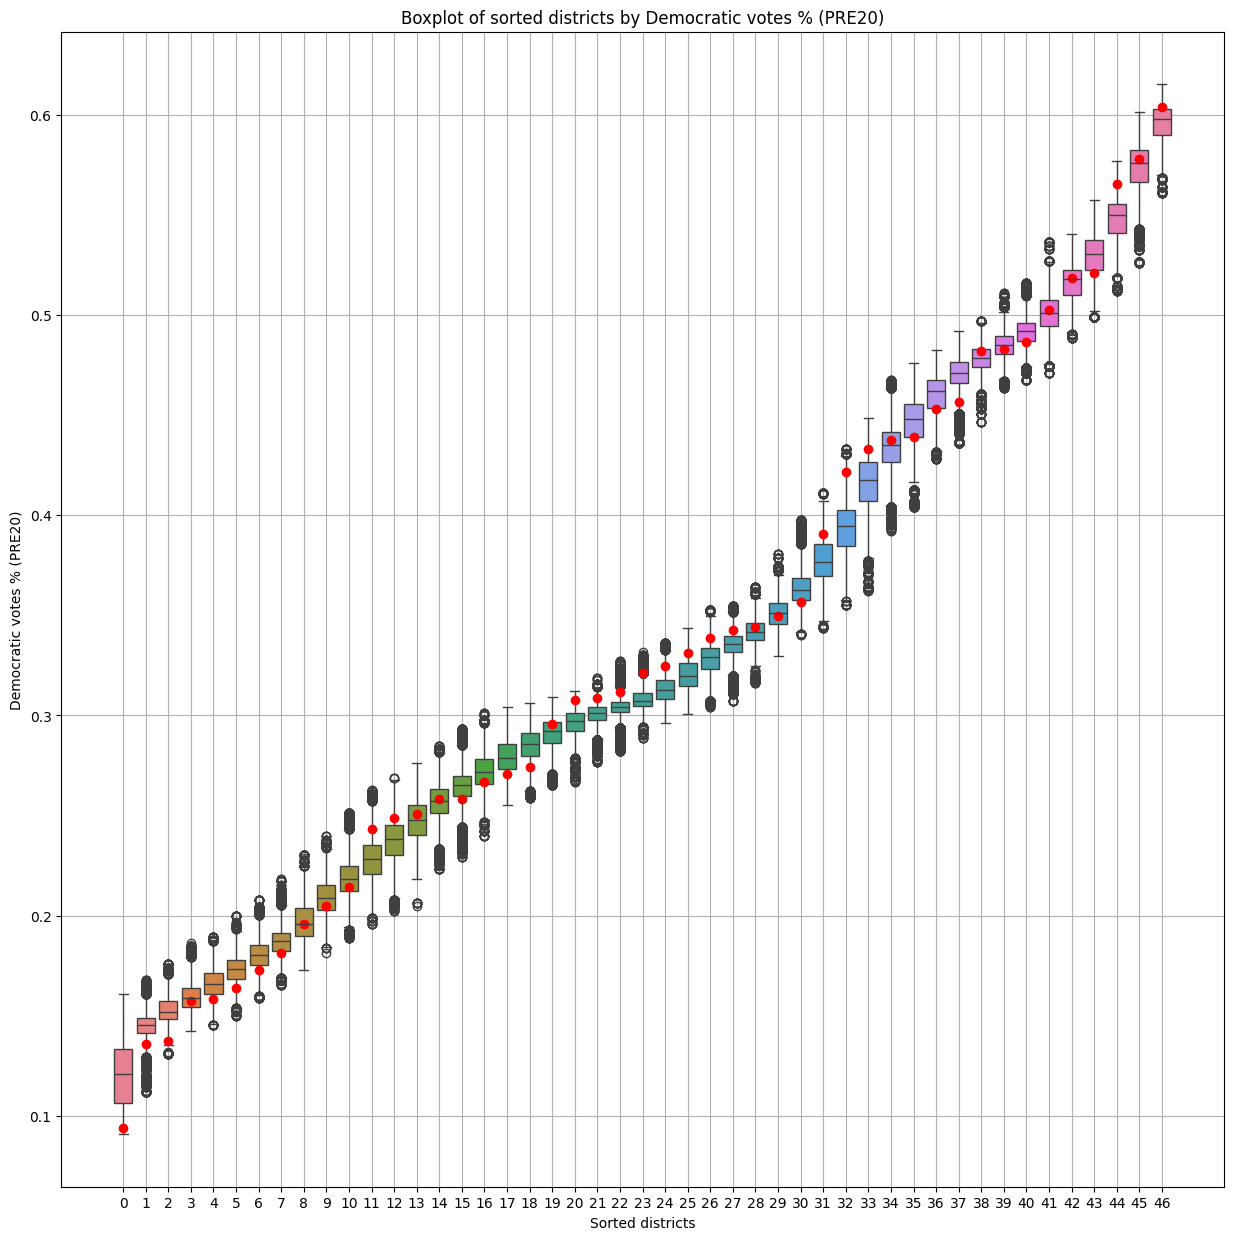

In [13]:
dem_election_votes_cols = [f'PRE20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'PRE20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (PRE20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (PRE20)')
ax.grid(True)

# Display the plot
plt.show()

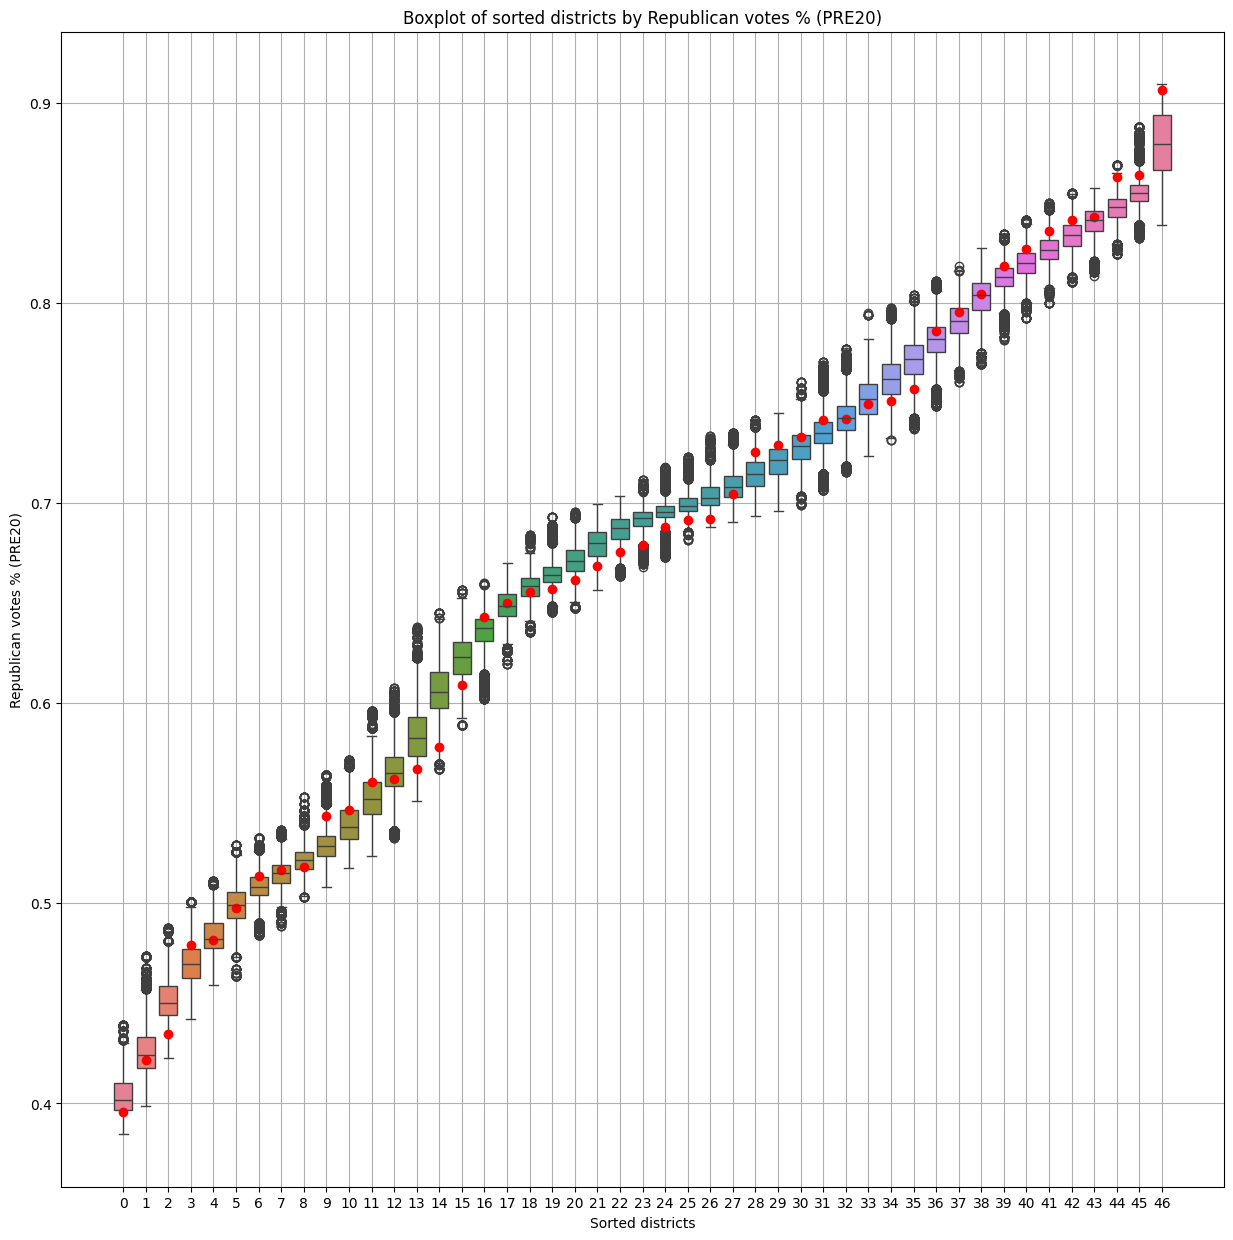

In [14]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (PRE20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (PRE20)')
ax.grid(True)

# Display the plot
plt.show()

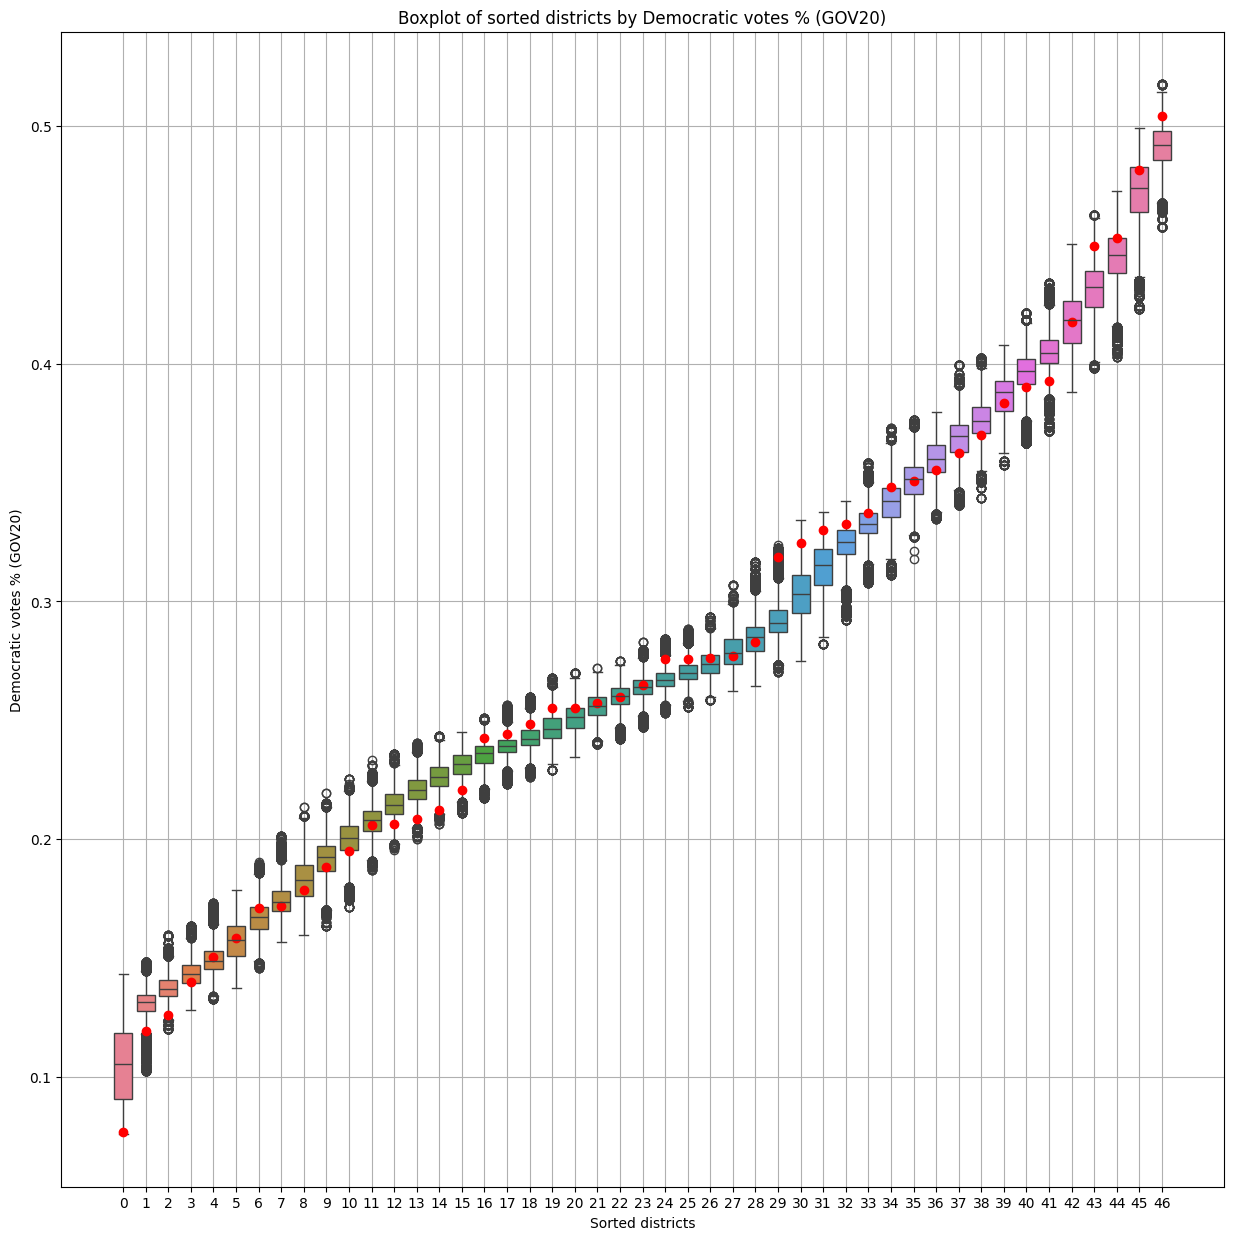

In [15]:
dem_election_votes_cols = [f'GOV20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'GOV20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (GOV20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (GOV20)')
ax.grid(True)

# Display the plot
plt.show()

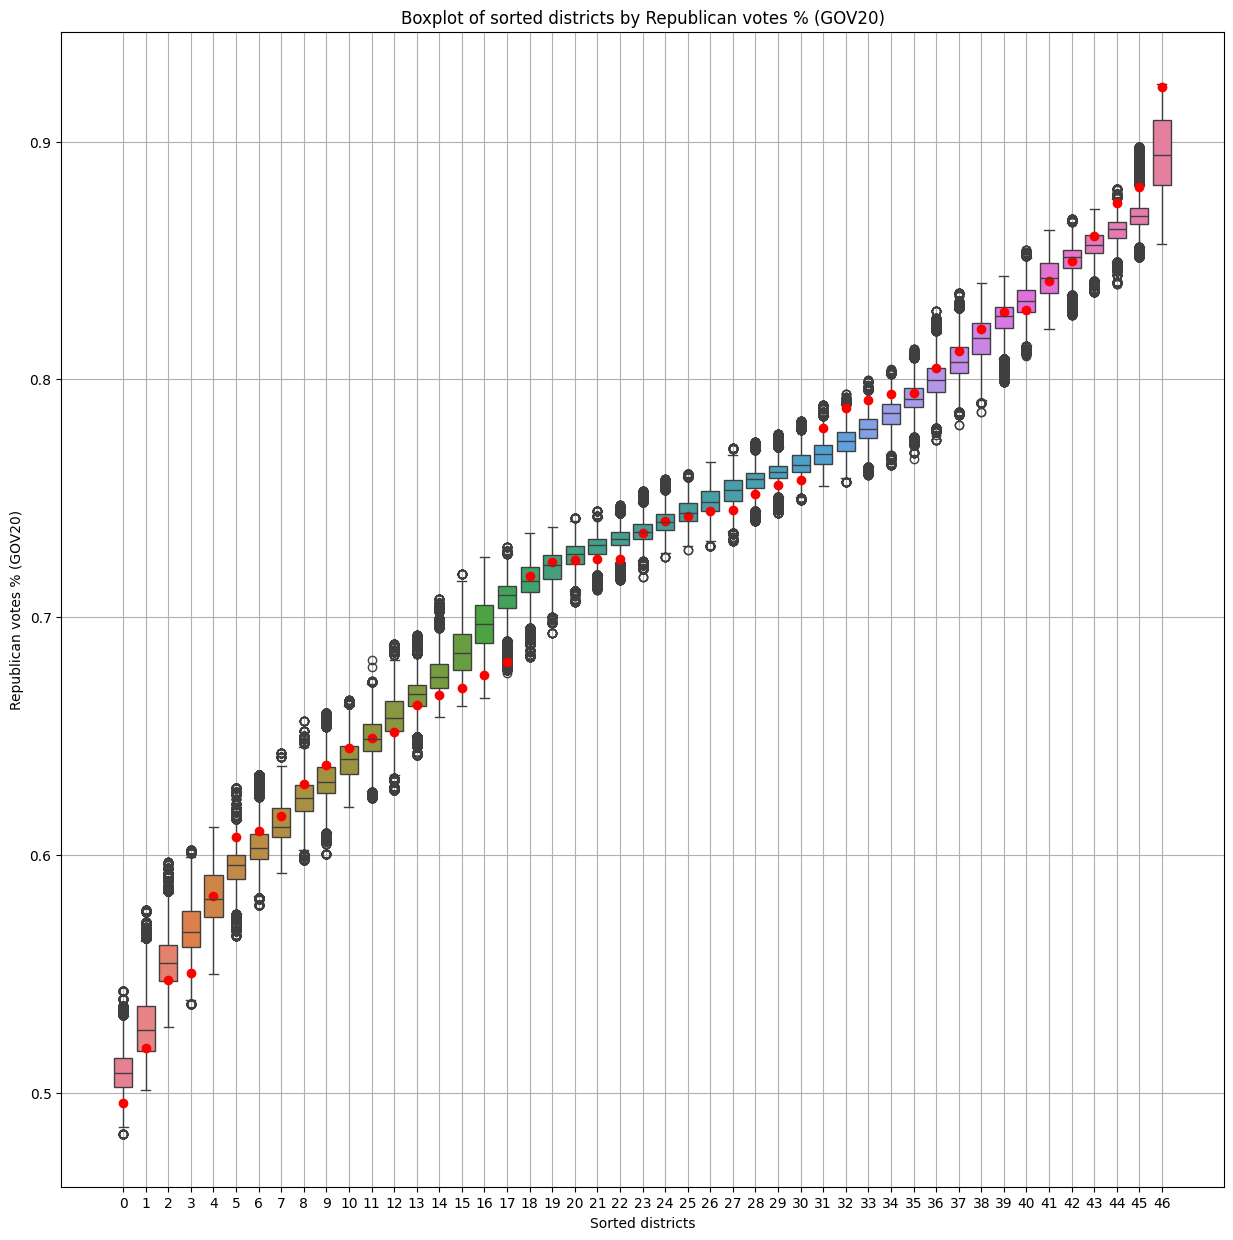

In [16]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (GOV20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (GOV20)')
ax.grid(True)

# Display the plot
plt.show()

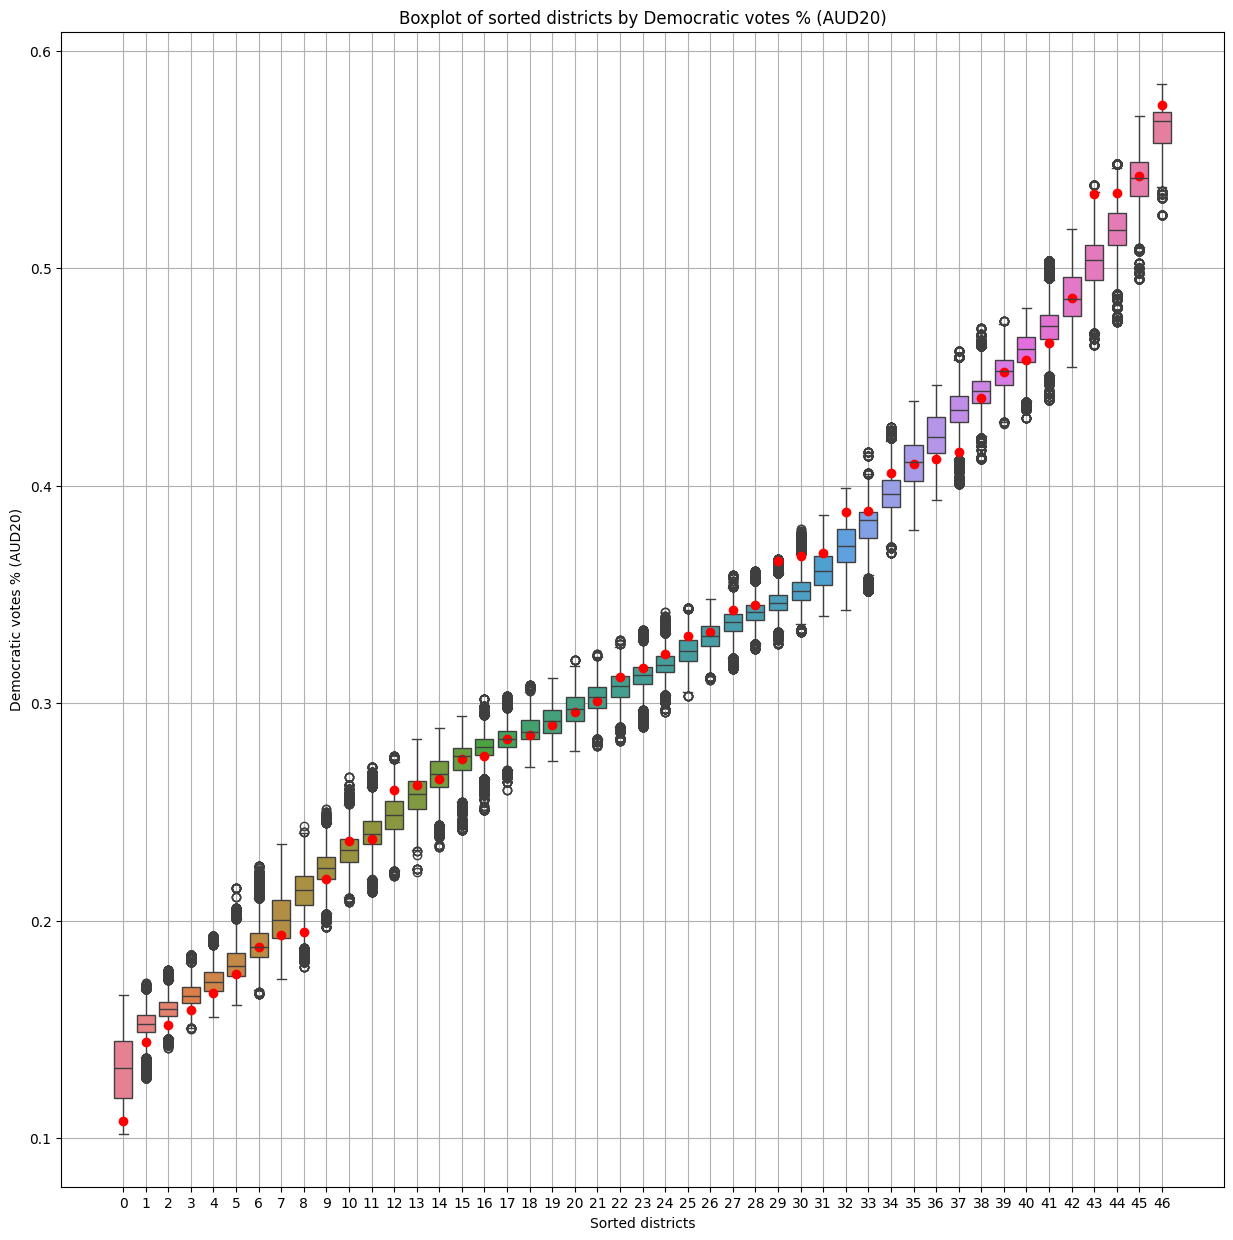

In [17]:
dem_election_votes_cols = [f'AUD20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'AUD20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (AUD20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (AUD20)')
ax.grid(True)

# Display the plot
plt.show()

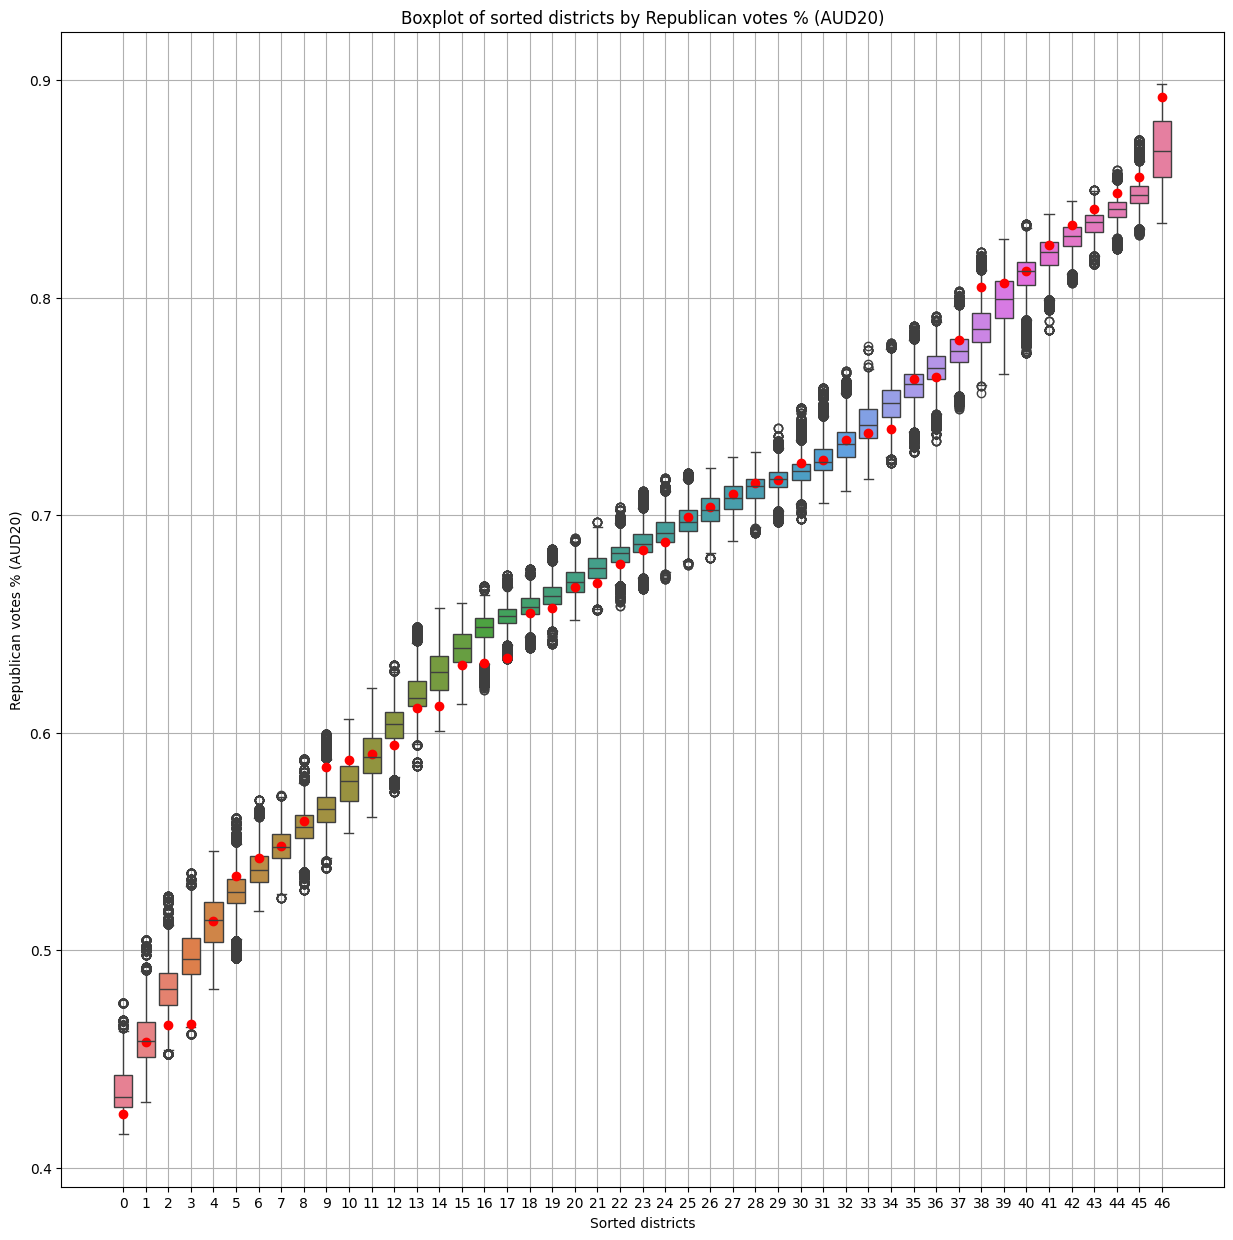

In [18]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (AUD20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (AUD20)')
ax.grid(True)

# Display the plot
plt.show()

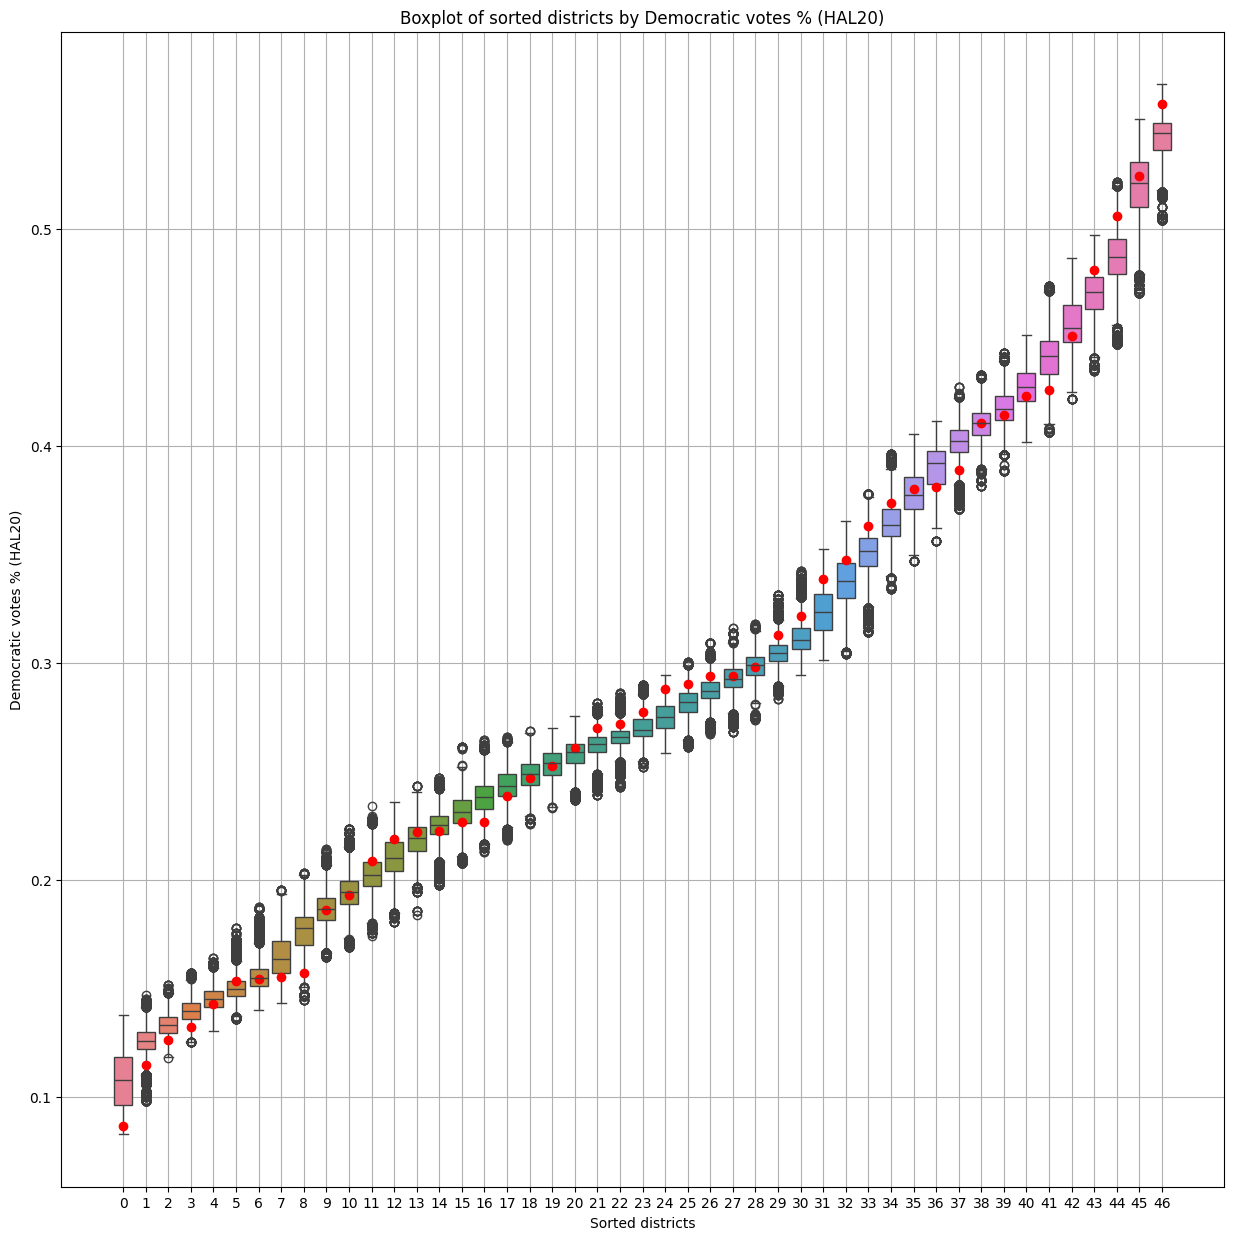

In [19]:
dem_election_votes_cols = [f'HAL20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'HAL20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (HAL20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (HAL20)')
ax.grid(True)

# Display the plot
plt.show()

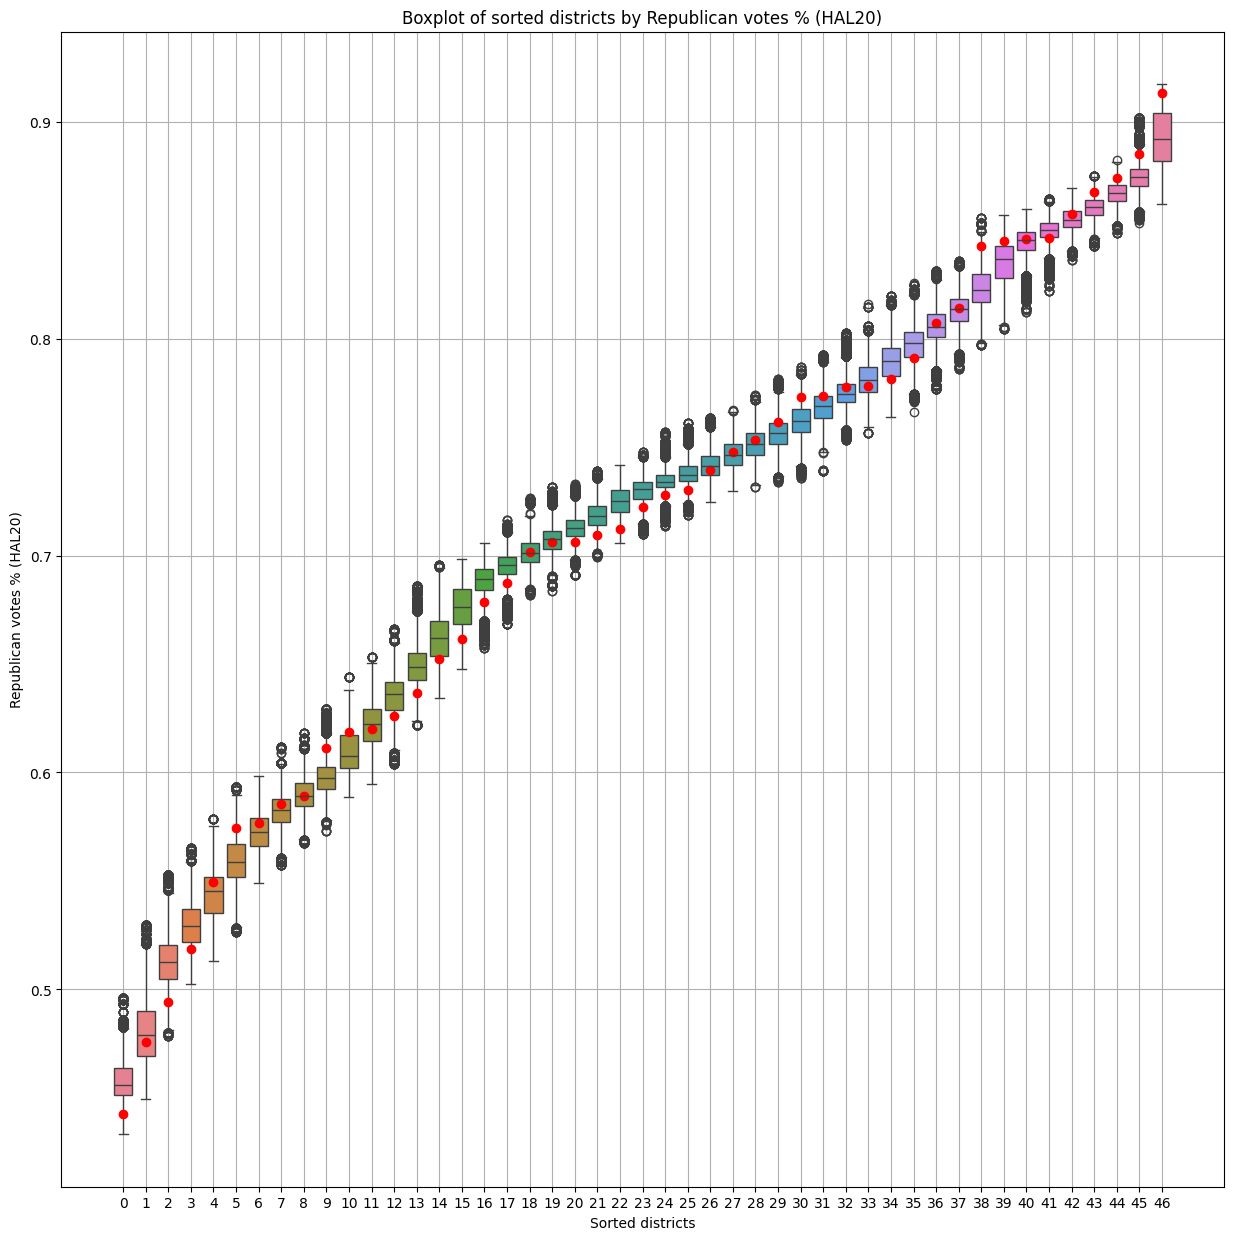

In [20]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (HAL20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (HAL20)')
ax.grid(True)

# Display the plot
plt.show()

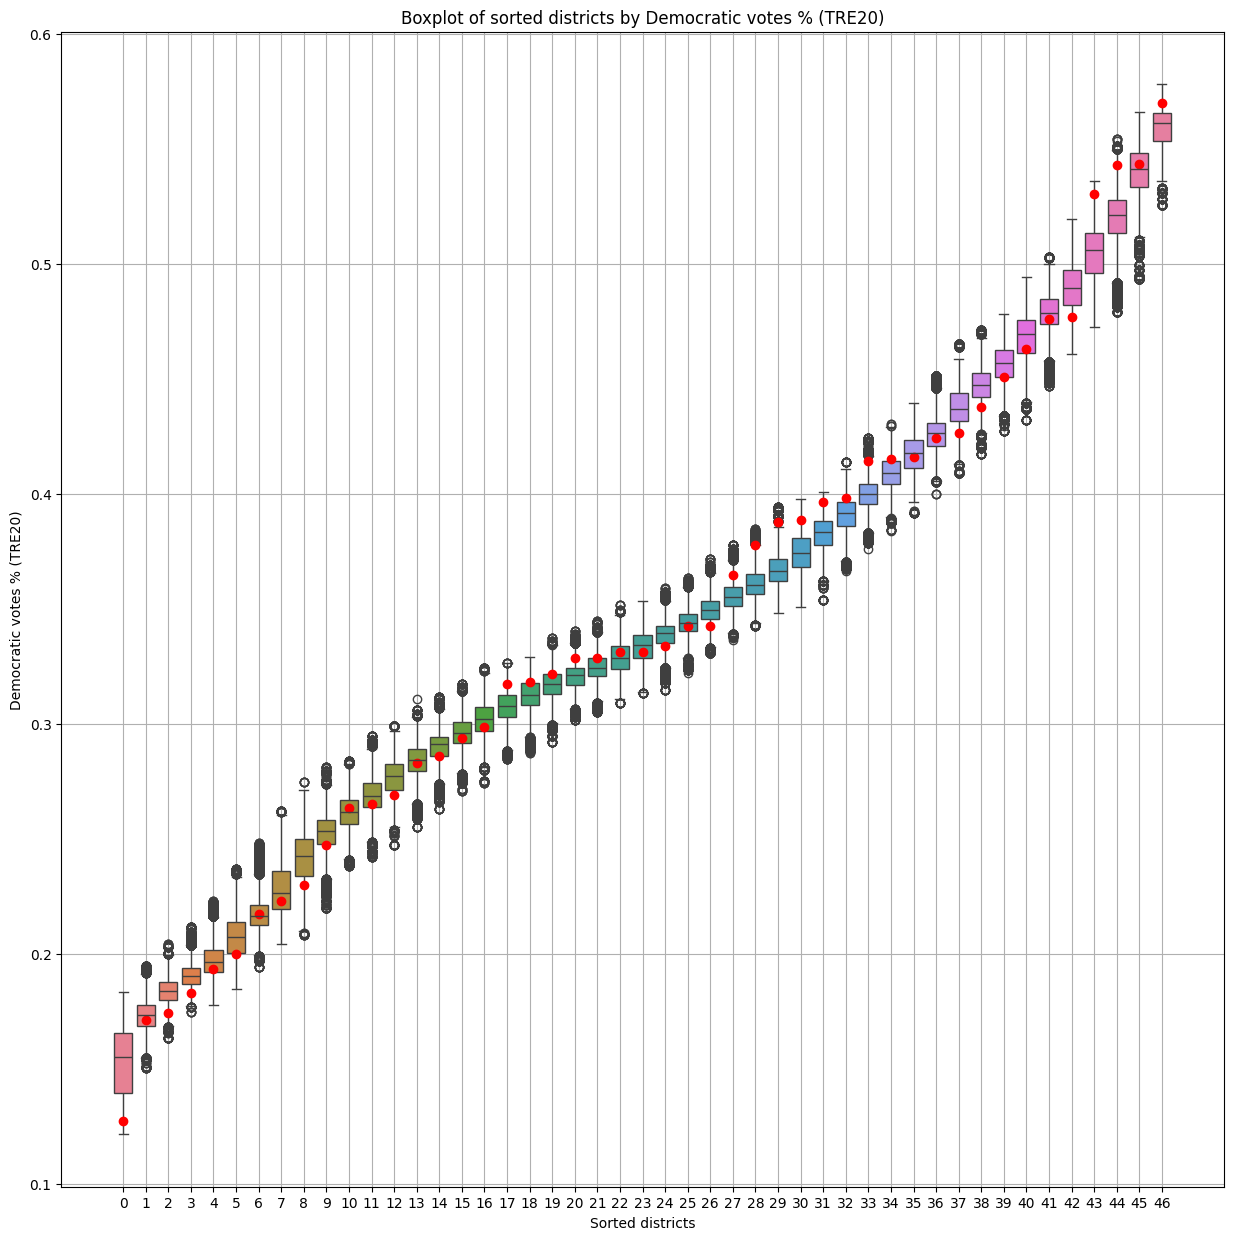

In [21]:
dem_election_votes_cols = [f'TRE20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'TRE20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (TRE20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (TRE20)')
ax.grid(True)

# Display the plot
plt.show()

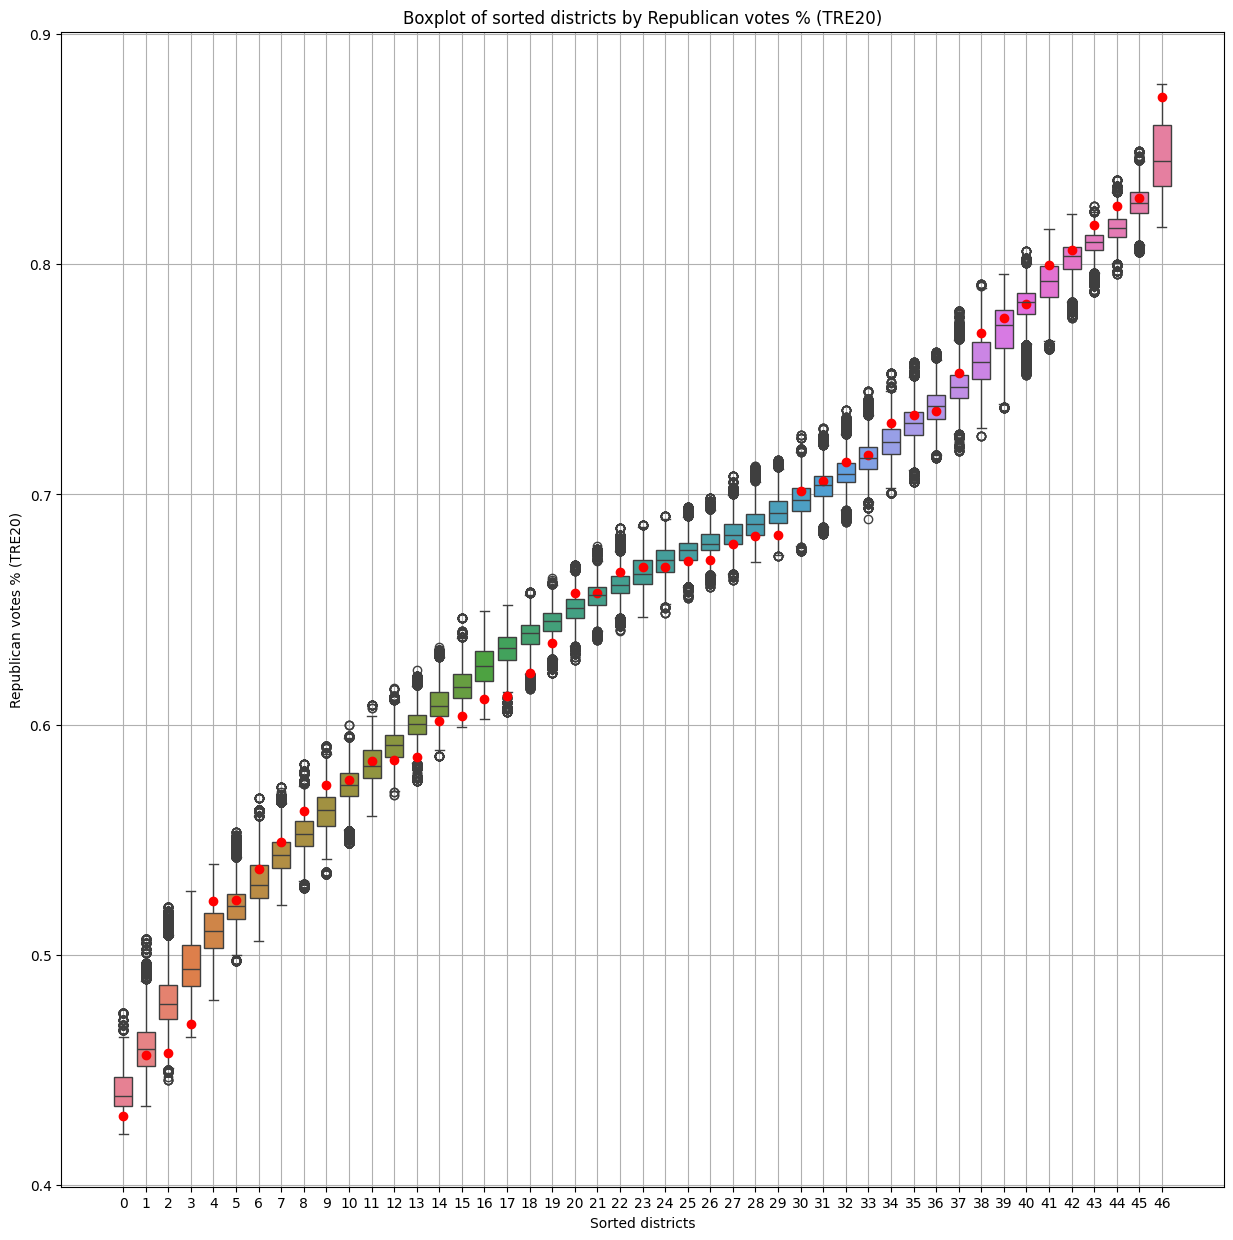

In [22]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (TRE20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (TRE20)')
ax.grid(True)

# Display the plot
plt.show()

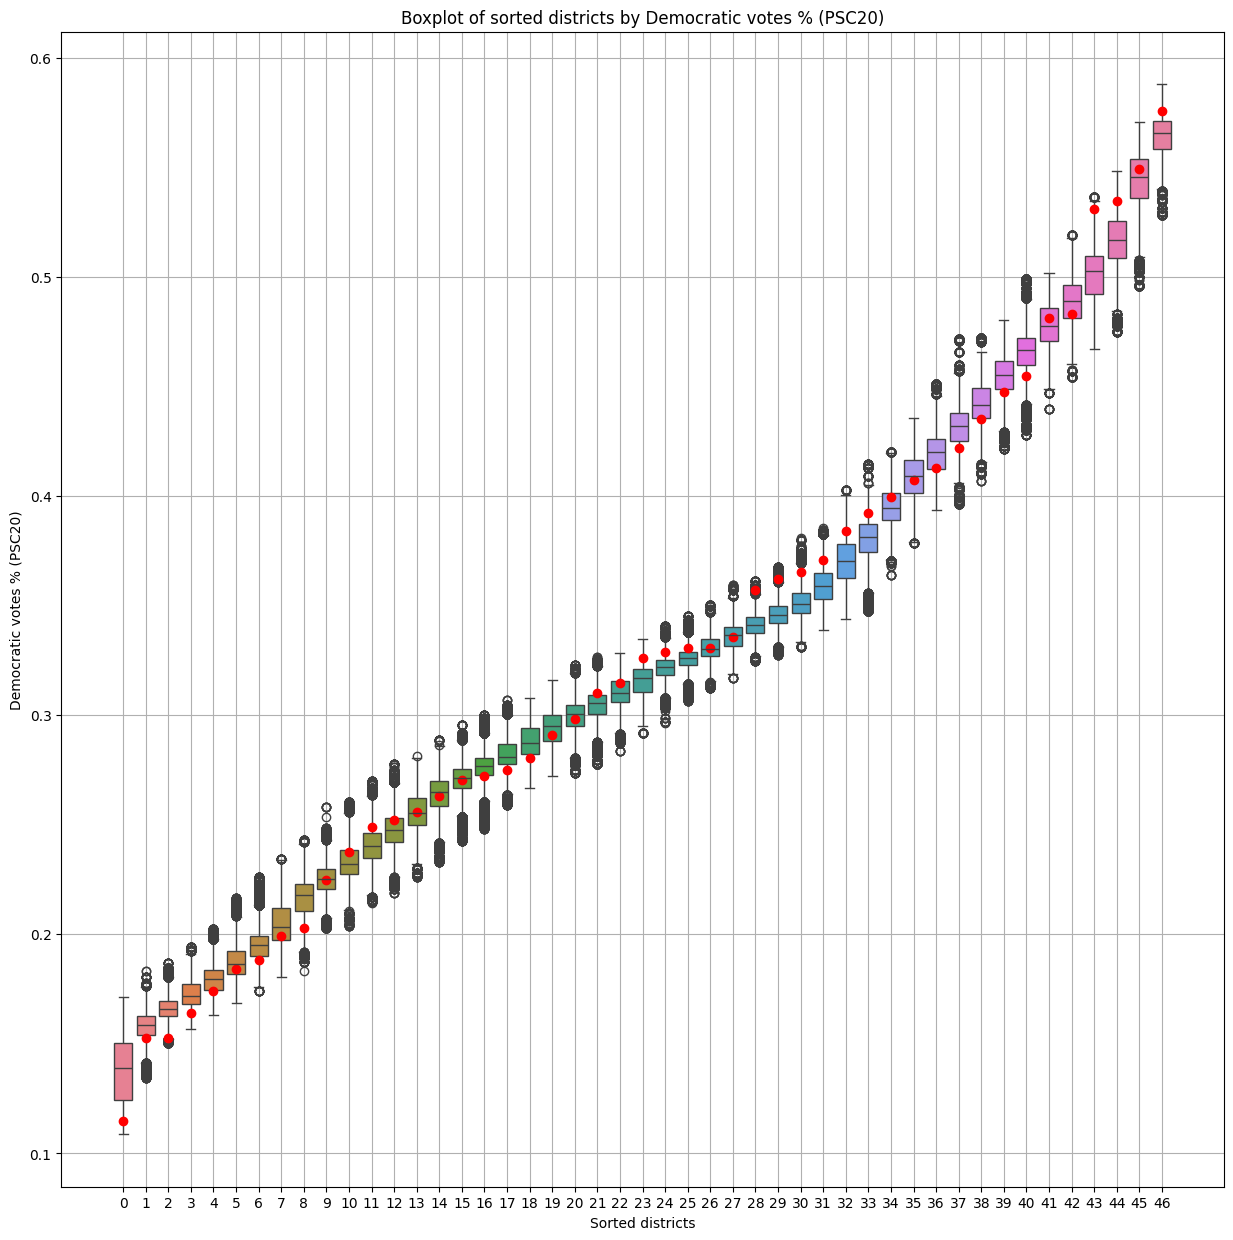

In [23]:
dem_election_votes_cols = [f'PSC20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'PSC20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (PSC20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (PSC20)')
ax.grid(True)

# Display the plot
plt.show()

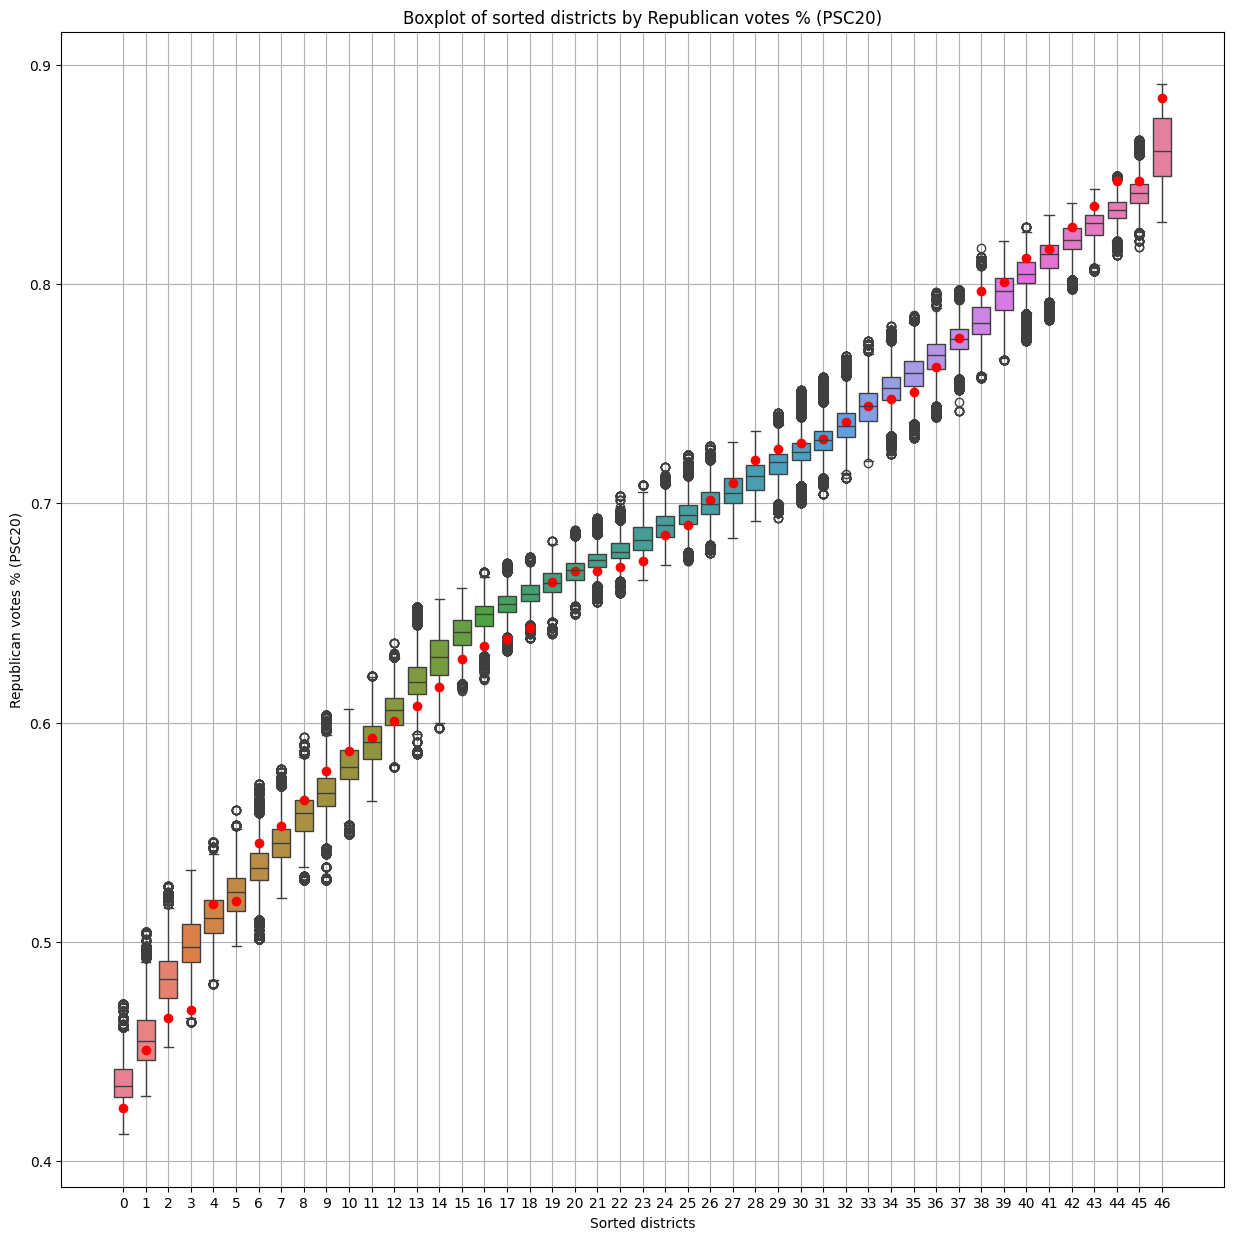

In [24]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (PSC20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (PSC20)')
ax.grid(True)

# Display the plot
plt.show()